In [1]:
import cv2
import mediapipe as mp

img = cv2.imread('tiger.png', cv2.IMREAD_UNCHANGED)
img.shape

(200, 200, 4)

# 알파 채널 조정해서 mask 파일로 저장

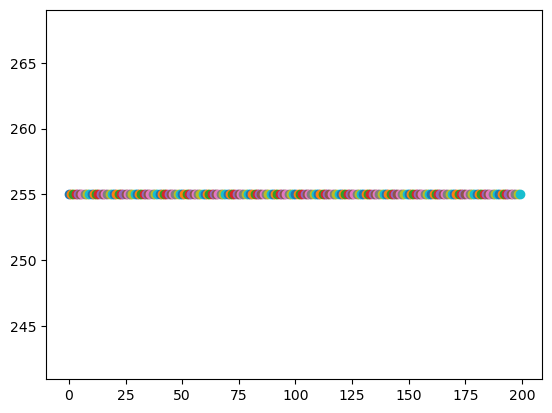

In [2]:
import matplotlib.pyplot as plt
for i in range(0,len(img[49,:,3])):
    plt.scatter(i, img[49,i,3])
plt.show()

C:\Users\gotze\AppData\Local\Temp\ipykernel_19080\752542575.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  img[i,j,3] = 255 - (img[i,j,0] + img[i,j,1] + img[i,j,2])


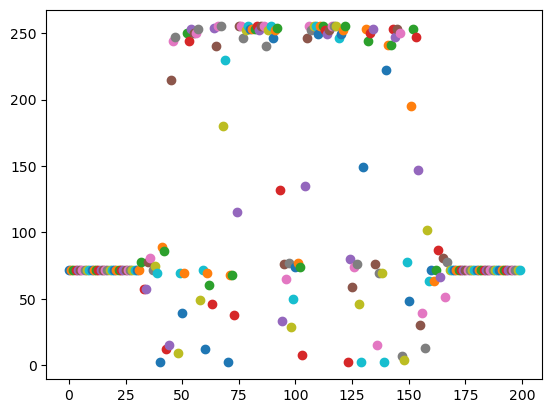

In [3]:
import numpy as np
img = cv2.imread('tiger.png', cv2.IMREAD_UNCHANGED)

for i in range(0,200):
    for j in range(0,200):
        img[i,j,3] = 255 - (img[i,j,0] + img[i,j,1] + img[i,j,2])

for i in range(0,len(img[49,:,3])):
    plt.scatter(i, img[49,i,3])
plt.show()

In [4]:
result = cv2.imwrite('mask.png', img)
result

True

# 위 고 노리치에 눈 코 붙여주기

In [6]:
import cv2
import mediapipe as mp
cap = cv2.VideoCapture('wegonorwich.mp4')
while cap.isOpened():
    success, image = cap.read()
    if not success:
        break
    cv2.imshow('window', image)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
import cv2
import mediapipe as mp

# 얼굴을 찾고 찾은 얼굴에 표시를 해주기 위한 변수
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 모듈
mp_drawing = mp.solutions.drawing_utils # 얼굴의 특징을 그리기 위한 모듈

# 파일 열기
cap = cv2.VideoCapture('wegonorwich.mp4')

img_l_eye = cv2.imread('img_l_eye.png')
img_r_eye = cv2.imread('img_r_eye.png')
img_nose = cv2.imread('img_nose.png')

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.999) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        if results.detections:
            for detection in results.detections:
                # mp_drawing.draw_detection(image, detection)
                for detection in results.detections: # 오른 눈, 왼 눈, 코, 입, 오른 귀, 왼 귀
                    # mp_drawing.draw_detection(image, detection)
                    keypoints = detection.location_data.relative_keypoints
                    r_eye = keypoints[0]
                    l_eye = keypoints[1]
                    nose = keypoints[2]
                    
                    h, w, _ = image.shape # height width channel
                    r_eye = (int(r_eye.x * w), int(r_eye.y * h))
                    l_eye = (int(l_eye.x * w), int(l_eye.y * h))
                    nose = (int(nose.x * w), int(nose.y * h))

                    # cv2.circle(image, r_eye, 10, (255,255,255), 2, cv2.LINE_AA)
                    # cv2.circle(image, l_eye, 10, (255,255,255), 2, cv2.LINE_AA)
                    # cv2.circle(image, nose, 10, (0,0,255), 2, cv2.LINE_AA)

                    image[r_eye[1]-30:r_eye[1]+30, r_eye[0]-30:r_eye[0]+30] = img_r_eye
                    image[l_eye[1]-30:l_eye[1]+30, l_eye[0]-30:l_eye[0]+30] = img_l_eye
                    image[nose[1]-30:nose[1]+30, nose[0]-50:nose[0]+50] = img_nose
                    
                    print(detection.location_data.relative_keypoints[0].x) # 오른 눈의 위치
                    
        cv2.imshow('MediaPipe Face Detection', image)
        if cv2.waitKey(1) == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

0.14098823070526123
0.48306700587272644
0.14098823070526123
0.48306700587272644
0.1491565853357315
0.4937325716018677
0.1491565853357315
0.4937325716018677
0.181841641664505
0.546042263507843
0.181841641664505
0.546042263507843
0.21246793866157532
0.5554923415184021
0.21246793866157532
0.5554923415184021
0.22232869267463684
0.5685302019119263
0.22232869267463684
0.5685302019119263
0.2240813821554184
0.5945327877998352
0.2240813821554184
0.5945327877998352
0.2235906422138214
0.5846908092498779
0.2235906422138214
0.5846908092498779
0.25006604194641113
0.6055147647857666
0.43836474418640137
0.25006604194641113
0.6055147647857666
0.43836474418640137
0.25006604194641113
0.6055147647857666
0.43836474418640137
0.2550504505634308
0.6009644865989685
0.2550504505634308
0.6009644865989685
0.264200896024704
0.5962563753128052
0.264200896024704
0.5962563753128052
0.2658197581768036
0.5839707255363464
0.2658197581768036
0.5839707255363464
0.2691675126552582
0.5775667428970337
0.2691675126552582
0.57

# 위 고 노리치에 마스트 붙여주기

In [12]:
import cv2
import mediapipe as mp

def overlay(image, x, y, w, h, overlay_image):
    alpha = overlay_image[:,:,3] # 알파 채널 (0~255, 높을수록 불투명)
    mask_image = alpha / 255
    
    for c in range(0, 3):
        image[y-h:y+h, x-w:x+w, c] = (overlay_image[:,:, c] * mask_image) + image[y-h:y+h, x-w:x+w, c] * (1-mask_image)

# 얼굴을 찾고 찾은 얼굴에 표시를 해주기 위한 변수
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 모듈
mp_drawing = mp.solutions.drawing_utils # 얼굴의 특징을 그리기 위한 모듈

# 파일 열기
cap = cv2.VideoCapture('wegonorwich.mp4')

mask = cv2.imread('mask.png', cv2.IMREAD_UNCHANGED)

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.999) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        if results.detections:
            nose = results.detections[0].location_data.relative_keypoints[2]
            h, w, _ = image.shape
            nose = (int(nose.x * w), int(nose.y * h))
            if nose[0] <= 100 or nose[1] <= 100:
                pass
            else:
                overlay(image, nose[0], nose[1], 100, 100, mask)
        cv2.imshow('we go norwich', image)
        if cv2.waitKey(1) == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
def overlay(image, x, y, w, h, overlay_image):
    alpha = overlay_image[:,:,3] # 알파 채널 (0~255, 높을수록 불투명)
    mask_image = alpha / 255
    return mask_image

overlay(image, nose[1], nose[0], 100, 100, mask)[55][44]

0.3058823529411765